### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
#Car has the majority missing data
missing_values_pct = (data.isnull().sum() / len(data)) * 100
print(missing_values_pct)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


In [9]:
#Replace missing values with placeholders
data['car'] = data['car'].fillna('nacar')
data['Bar'] = data['Bar'].fillna('naBar')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('naCoffeeHouse')
data['CarryAway'] = data['CarryAway'].fillna('naCarryAway')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('naRestLessThan20')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('naRest20To50')

In [10]:
#Checking missing data now
missing_values_new = data.isnull().sum()
print(missing_values_new)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [18]:
#Calculate proportion of drivers who accepted the coupon
coupon_acceptance = data['Y'].sum()
coupon_total = data['Y'].count()
coupon_accept_proportion = (coupon_acceptance/coupon_total)*100
print("Proportion of coupons accepted in %:", coupon_accept_proportion)

Proportion of coupons accepted in %: 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon', ylabel='count'>

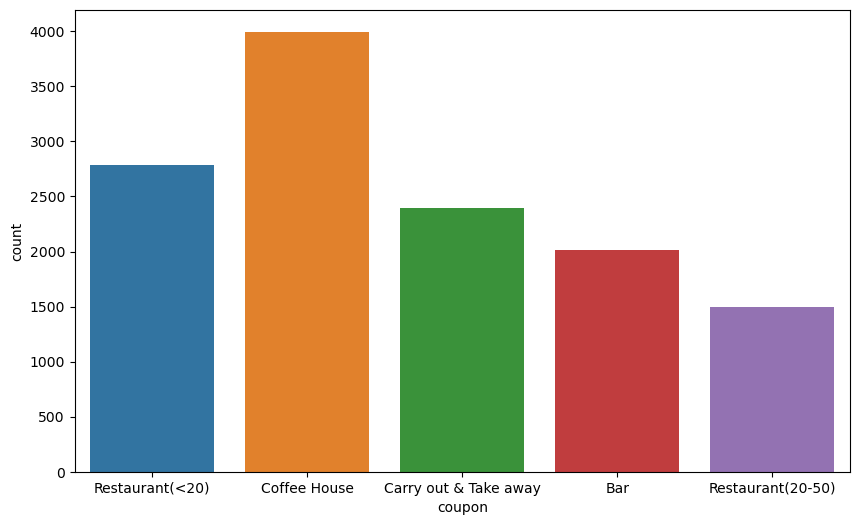

In [16]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)

6. Use a histogram to visualize the temperature column.

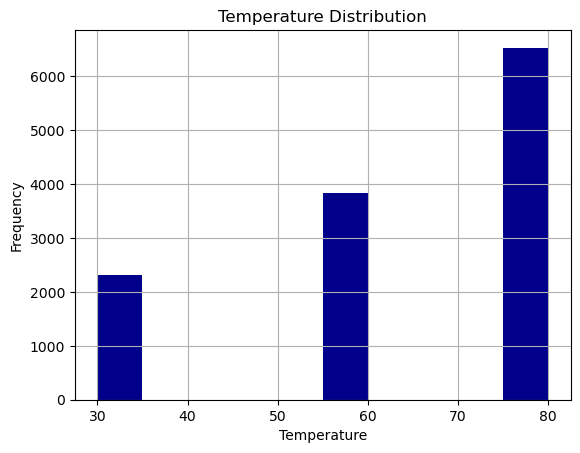

In [21]:
plt.figure() 
plt.hist(data['temperature'],color='darkblue')

plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
#Creating a dataframe that contains only entries where coupon is bar
bar_df = data[data['coupon'] == 'Bar']
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

In [31]:
bar_df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,naCarryAway,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,naCarryAway,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,naCarryAway,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [30]:
#Calculate proportion of drivers who accepted the bar coupon
proportion_accepted = bar_df['Y'].mean()

print("Proportion of bar coupons accepted:", proportion_accepted)

Proportion of bar coupons accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [52]:
# Categorize based on the 'Bar' frequency of less than or equal to 3 times a month

three_or_less = bar_df[bar_df['Bar'].isin(['never', 'less1', '1~3'])]
three_or_less.count()


destination             1797
passanger               1797
weather                 1797
temperature             1797
time                    1797
coupon                  1797
expiration              1797
gender                  1797
age                     1797
maritalStatus           1797
has_children            1797
education               1797
occupation              1797
income                  1797
car                     1797
Bar                     1797
CoffeeHouse             1797
CarryAway               1797
RestaurantLessThan20    1797
Restaurant20To50        1797
toCoupon_GEQ5min        1797
toCoupon_GEQ15min       1797
toCoupon_GEQ25min       1797
direction_same          1797
direction_opp           1797
Y                       1797
dtype: int64

In [58]:
# Categorize based on the 'Bar' frequency of more than 3 times a month
more_than_three = bar_df[bar_df['Bar'].isin(['4~8', 'gt8'])]
more_than_three.count()

destination             199
passanger               199
weather                 199
temperature             199
time                    199
coupon                  199
expiration              199
gender                  199
age                     199
maritalStatus           199
has_children            199
education               199
occupation              199
income                  199
car                     199
Bar                     199
CoffeeHouse             199
CarryAway               199
RestaurantLessThan20    199
Restaurant20To50        199
toCoupon_GEQ5min        199
toCoupon_GEQ15min       199
toCoupon_GEQ25min       199
direction_same          199
direction_opp           199
Y                       199
dtype: int64

In [59]:
# Calculate acceptance rates
acceptance_rate_three_or_less = three_or_less['Y'].mean()
acceptance_rate_more_than_three = more_than_three['Y'].mean()

In [60]:
print("Acceptance rate for those who visit a bar 3 or fewer times a month:", acceptance_rate_three_or_less)
print("Acceptance rate for those who visit a bar more than 3 times a month:", acceptance_rate_more_than_three)

Acceptance rate for those who visit a bar 3 or fewer times a month: 0.37061769616026713
Acceptance rate for those who visit a bar more than 3 times a month: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [68]:
#Drivers who go to a bar more than once a month and are over the age of 25
cohort_1 = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'].isin(['26', '31', '36', '41', '46', '50plus']))]
cohort_1.count()

destination             420
passanger               420
weather                 420
temperature             420
time                    420
coupon                  420
expiration              420
gender                  420
age                     420
maritalStatus           420
has_children            420
education               420
occupation              420
income                  420
car                     420
Bar                     420
CoffeeHouse             420
CarryAway               420
RestaurantLessThan20    420
Restaurant20To50        420
toCoupon_GEQ5min        420
toCoupon_GEQ15min       420
toCoupon_GEQ25min       420
direction_same          420
direction_opp           420
Y                       420
age_num                 353
dtype: int64

In [70]:
# All other drivers
cohort_2 = bar_df[((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'].isin(['21', 'below21'])))]
cohort_2.count()

destination             176
passanger               176
weather                 176
temperature             176
time                    176
coupon                  176
expiration              176
gender                  176
age                     176
maritalStatus           176
has_children            176
education               176
occupation              176
income                  176
car                     176
Bar                     176
CoffeeHouse             176
CarryAway               176
RestaurantLessThan20    176
Restaurant20To50        176
toCoupon_GEQ5min        176
toCoupon_GEQ15min       176
toCoupon_GEQ25min       176
direction_same          176
direction_opp           176
Y                       176
age_num                 166
dtype: int64

In [71]:
# Calculate the acceptance rate for each group
acceptance_rate_cohort_1 = cohort_1['Y'].mean()
acceptance_rate_cohort_2 = cohort_2['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_cohort_1}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_cohort_2}")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.6952380952380952
Acceptance rate for all other drivers: 0.6704545454545454


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [84]:
# Categorize drivers who who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
filter_1 = bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])
filter_2 = bar_df['passanger']!='Kid(s)'
filter_3 = ~bar_df['occupation'].isin(['farming', 'fishing', 'forestry'])
filter_total = filter_1 & filter_2 & filter_3

In [86]:
# acceptance rate comparison
acceptance_rate_filter_1 = bar_df[filter_1]['Y'].mean()
acceptance_rate_filter_2 = bar_df[filter_2]['Y'].mean()
acceptance_rate_filter_3 = bar_df[filter_3]['Y'].mean()
acceptance_rate_filter_total = bar_df[filter_total]['Y'].mean()
print(acceptance_rate_filter_1)
print(acceptance_rate_filter_2)
print(acceptance_rate_filter_3)
print(acceptance_rate_filter_total)


0.6879194630872483
0.43290999447818884
0.41001487357461575
0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [90]:
#Categorize drivers based on marital status, age, restaurant visits and income
filter_4 = bar_df['maritalStatus']!='widowed'
filter_5 = bar_df['age'].isin(['21', '26', 'below21'])
filter_6 = bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])
filter_7 = bar_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49'])


In [97]:
#compare acceptance rate for various scenarios
acceptance_rate_cnd_1 = bar_df[filter_1 & filter_2 & filter_4]['Y'].mean()
acceptance_rate_cnd_2 = bar_df[filter_1 & filter_5]['Y'].mean()
acceptance_rate_cnd_3 = bar_df[filter_6 & filter_7]['Y'].mean()
print(acceptance_rate_cnd_1)
print(acceptance_rate_cnd_2)
print(acceptance_rate_cnd_3)

0.7132486388384754
0.7217391304347827
0.43902439024390244


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Based on the observations, the tendency of the driver to accept the bar coupon depends majorly on the following factors:
- habit of going to the bar more than once a month
- co-passengers along
- income
- eating out habits

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [122]:
data['temperature'] = data['temperature'].astype(str)

In [123]:
#Exploring the coupon group: Coffee House
coffee_df = data[data['coupon'] == 'Coffee House']
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           3996 non-null   object 
 1   passanger             3996 non-null   object 
 2   weather               3996 non-null   object 
 3   temperature           3996 non-null   object 
 4   time                  3996 non-null   object 
 5   coupon                3996 non-null   object 
 6   expiration            3996 non-null   object 
 7   gender                3996 non-null   object 
 8   age                   3996 non-null   object 
 9   maritalStatus         3996 non-null   object 
 10  has_children          3996 non-null   int64  
 11  education             3996 non-null   object 
 12  occupation            3996 non-null   object 
 13  income                3996 non-null   object 
 14  car                   3996 non-null   object 
 15  Bar                   399

<Axes: xlabel='time'>

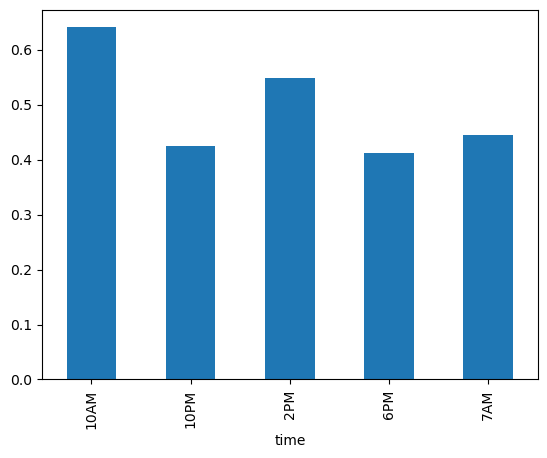

In [124]:
#Plotting coffee house coupons acceptance at various times of the day
acceptance_by_time = coffee_df.groupby('time')['Y'].mean()
acceptance_by_time.plot(kind = 'bar')


<Axes: xlabel='temperature'>

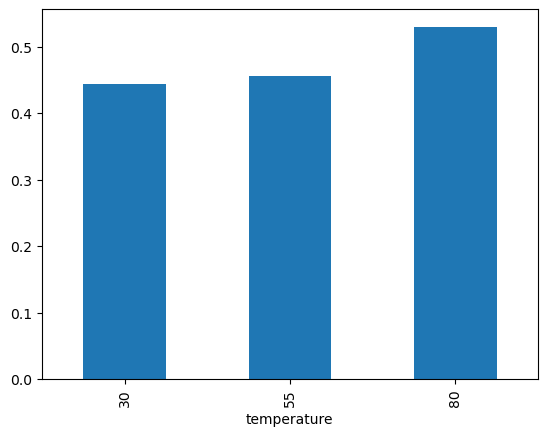

In [125]:
#Plotting coffee house coupons acceptance at various temperatures
acceptance_by_temperature = coffee_df.groupby('temperature')['Y'].mean()
acceptance_by_temperature.plot(kind = 'bar')

In [126]:
# Categorise drivers in the morning at low temperatures
filter_morning = coffee_df['time'].isin(['10AM','7AM'])
filter_temp = coffee_df['temperature'].isin(['30', '55'])
filter_combined = filter_morning & filter_temp
acceptance_morning = coffee_df[filter_morning]['Y'].mean()
acceptance_temp = coffee_df[filter_temp]['Y'].mean()
acceptance_rate = coffee_df[filter_combined]['Y'].mean()
print(acceptance_rate)
print(acceptance_morning)
print (acceptance_temp)

0.46293888166449937
0.5424944812362031
0.45329153605015676


In [130]:
# Further categorise drivers
filter_alone = coffee_df['passanger'].isin(['Alone'])
filter_age = coffee_df['age'].isin(['below21', '26', '21'])
acceptance_alone = coffee_df[filter_alone & filter_age]['Y'].mean()
print(acceptance_alone)

0.4546732255797611


## from the above exploration, it can be concluded that drivers who are alone and below the age of 30 tend to accept the coffee coupons more than drivers above 30 and driving alone
## there is no significant difference in the acceptance behaviour for days when it is hot vs cold or time of the day.